In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:

df1 = pd.read_csv("final_ml_training_data_updated.csv")
df2 = pd.read_csv("final_ml_training_data2_updated.csv")

# Combine both datasets
df = pd.concat([df1, df2], ignore_index=True)


In [5]:
df.head(10)

,Base,Rank,Confidence,Distance,Avg_Energy,Std_Energy,Hbond,RMSD_Top,Population,Num_Clusters,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,base2081-iso0,rank1_mod,0.03,0.556,-14.8363,2.8739,1.0,1.7591,0.799,186,...,0,0,0,0,0,0,0,0,0,0
1,base2081-iso0,rank2_mod,0.47,0.591,-9.4269,2.6669,2.0,4.1357,0.084,2017,...,0,0,0,0,0,0,0,0,0,0
2,base2081-iso0,rank3_mod,0.49,0.592,-9.7089,5.4747,0.0,4.1274,0.055,2148,...,0,0,0,0,0,0,0,0,0,0
3,base2063-iso0,rank1_mod,0.13,0.696,-11.8225,3.5839,1.0,4.1374,0.089,2118,...,0,0,0,0,0,0,0,0,0,0
4,base2063-iso0,rank2_mod,0.09,0.540,-14.2149,3.7469,2.0,6.2235,0.129,1765,...,0,0,0,0,0,0,0,0,0,0
5,base2063-iso0,rank3_mod,0.33,0.550,-14.2069,2.8757,1.0,2.0862,0.464,605,...,0,0,0,0,0,0,0,0,0,0
6,base2056-iso0,rank1_mod,0.25,1.920,-7.0634,2.1203,0.0,24.7586,0.044,2052,...,0,0,0,0,0,0,0,0,0,0
7,base2056-iso0,rank2_mod,0.28,0.645,-10.0993,3.1439,2.0,4.3610,0.055,2137,...,0,0,0,0,0,0,0,0,0,0
8,base2056-iso0,rank3_mod,1.26,0.516,-9.9192,2.0254,1.0,8.0727,0.146,1665,...,0,0,0,0,0,0,0,0,0,0
9,base2043-iso0,rank1_mod,1.25,0.683,-23.0171,4.4390,0.0,2.7161,0.310,1171,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df["Class"]

0      1
1      1
2      1
3      1
4      1
      ..
103    0
104    0
105    0
106    0
107    0
Name: Class, Length: 108, dtype: int64

In [12]:
df.columns

Index(['Base', 'Rank', 'Confidence', 'Distance', 'Avg_Energy', 'Std_Energy',
       'Hbond', 'RMSD_Top', 'Population', 'Num_Clusters',
       ...
       'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene',
       'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=224)

In [13]:
df = df.sort_values(by="Base")

In [14]:
df

,Base,Rank,Confidence,Distance,Avg_Energy,Std_Energy,Hbond,RMSD_Top,Population,Num_Clusters,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
83,base2042-iso0,rank3_mod,0.38,0.593,-10.3435,2.9101,0.0,6.2365,0.108,2195,...,0,0,0,0,0,0,0,0,0,0
82,base2042-iso0,rank2_mod,0.02,0.589,-10.5186,2.4606,0.0,1.7051,0.475,1413,...,0,0,0,0,0,0,0,0,0,0
81,base2042-iso0,rank1_mod,0.25,0.579,-10.1078,3.2055,0.0,4.8079,0.344,1619,...,0,0,0,0,0,0,0,0,0,0
11,base2043-iso0,rank3_mod,2.34,0.631,-19.3603,2.2797,1.0,23.6641,0.115,1535,...,0,0,0,0,0,0,0,0,0,0
9,base2043-iso0,rank1_mod,1.25,0.683,-23.0171,4.4390,0.0,2.7161,0.310,1171,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,base2507-iso0,rank1_mod,0.46,0.526,-19.3790,3.3430,2.0,6.0087,0.637,374,...,0,0,0,0,0,0,0,0,0,0
73,base2507-iso0,rank2_mod,1.69,2.054,-13.9172,2.8600,0.0,20.8466,0.398,866,...,0,0,0,0,0,0,0,0,0,0
66,base2508-iso0,rank1_mod,0.03,1.124,-17.5242,3.5250,1.0,8.3381,0.139,1991,...,0,0,0,0,0,0,0,0,0,0
67,base2508-iso0,rank2_mod,0.10,0.550,-13.7750,4.8664,1.0,6.1397,0.020,2254,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_filtered = df[df["Rank"] == "rank1_mod"]


In [18]:
df_filtered["Class"]

81     0
9      1
33     1
90     0
63     0
60     0
18     1
27     1
48     0
15     1
6      1
87     0
96     0
78     0
102    0
21     1
3      1
93     0
42     1
75     0
39     1
69     0
105    0
99     0
57     0
84     0
45     1
0      1
24     1
36     1
54     0
12     1
51     0
30     1
72     0
66     0
Name: Class, dtype: int64

In [19]:
from sklearn.ensemble import RandomForestClassifier



In [29]:
X = df_filtered.drop(columns=["Class","Base","Rank"])  # Features
y = df_filtered["Class"]  # Target variable

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)

feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

RMSD_Mode            0.033652
FpDensityMorgan2     0.028778
Num_Clusters         0.026678
SMR_VSA7             0.024583
MinEStateIndex       0.024248
                       ...   
fr_Ndealkylation1    0.000000
fr_N_O               0.000000
fr_NH2               0.000000
fr_NH1               0.000000
fr_urea              0.000000
Length: 221, dtype: float64


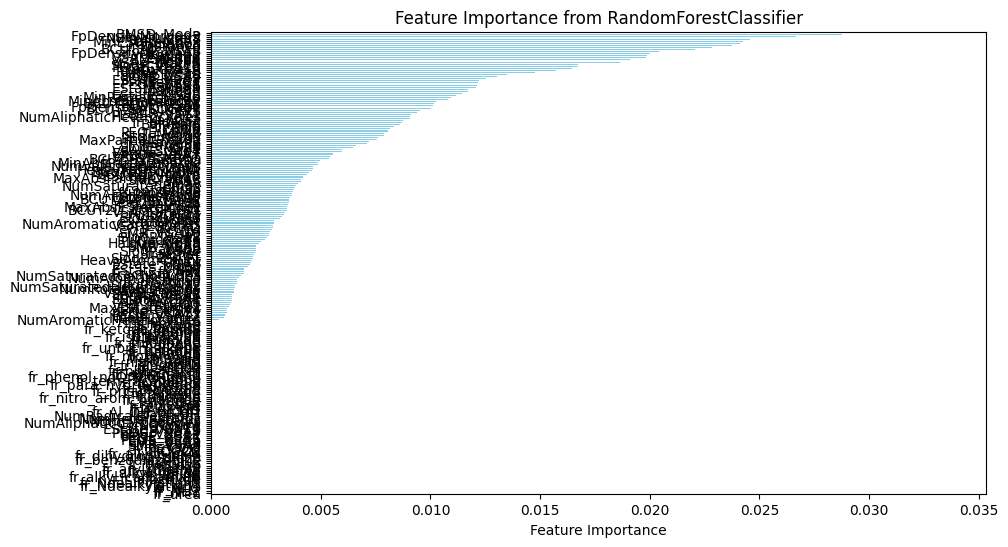

In [30]:
import matplotlib.pyplot as plt

# Plotting the feature importances
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from RandomForestClassifier')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

In [31]:
important_features = feature_importance[feature_importance > 0.010]
print(important_features)

RMSD_Mode            0.033652
FpDensityMorgan2     0.028778
Num_Clusters         0.026678
SMR_VSA7             0.024583
MinEStateIndex       0.024248
Population           0.024113
Distance             0.023735
BCUT2D_MRHI          0.022851
SlogP_VSA8           0.022082
FpDensityMorgan3     0.020440
Kappa3               0.020019
VSA_EState6          0.019861
RMSD_Top             0.019848
Hbond                0.019111
VSA_EState5          0.018637
SlogP_VSA10          0.016731
PEOE_VSA10           0.016723
LabuteASA            0.016451
RMSD_Mean            0.015703
RMSD_Std             0.014752
SlogP_VSA5           0.013471
PEOE_VSA9            0.013014
EState_VSA3          0.012519
BertzCT              0.012200
PEOE_VSA8            0.012182
Kappa1               0.012107
EState_VSA8          0.012093
MolLogP              0.011709
Chi4n                0.011709
EState_VSA2          0.011424
MinPartialCharge     0.011152
VSA_EState9          0.010933
MinAbsEStateIndex    0.010803
BCUT2D_MRL

In [32]:
df_filtered_imp = df_filtered[important_features.index]
df_filtered_imp

,RMSD_Mode,FpDensityMorgan2,Num_Clusters,SMR_VSA7,MinEStateIndex,Population,Distance,BCUT2D_MRHI,SlogP_VSA8,FpDensityMorgan3,...,MolLogP,Chi4n,EState_VSA2,MinPartialCharge,VSA_EState9,MinAbsEStateIndex,BCUT2D_MRLOW,PEOE_VSA6,FpDensityMorgan1,BCUT2D_LOGPHI
81,4.9873,2.083333,1619,22.747491,-0.369815,0.344,0.579,5.679163,11.163878,2.916667,...,-0.70470,0.890236,22.671484,-0.369251,0.000000,0.049074,1.123270,0.000000,1.333333,1.973049
9,2.1847,2.294118,1171,27.388080,-0.184233,0.310,0.683,7.709924,11.033401,3.000000,...,1.81219,1.706199,11.663233,-0.376942,0.000000,0.184233,0.072930,0.000000,1.529412,2.074810
33,2.5938,2.312500,625,36.810785,0.575370,0.730,0.548,5.812895,11.163878,3.187500,...,1.55800,1.478022,0.000000,-0.467477,0.000000,0.575370,0.517620,0.000000,1.312500,2.147878
90,27.8486,1.562500,1282,28.244368,0.040317,0.137,1.830,6.347544,11.387856,2.187500,...,2.00980,1.198675,11.896679,-0.367629,0.000000,0.040317,1.086428,23.201880,0.937500,2.280226
63,32.0953,1.842105,2100,35.522848,0.174594,0.063,1.921,5.474676,0.000000,2.473684,...,1.24900,1.780980,5.948339,-0.492870,3.200049,0.174594,0.354352,6.066367,1.105263,2.283953
60,29.2552,1.526316,1312,58.149093,-0.527593,0.049,1.992,6.297682,0.000000,2.263158,...,2.18162,2.423079,39.536075,-0.507159,0.000000,0.037407,0.097391,12.132734,0.842105,2.363123
18,2.7022,2.307692,347,17.584700,0.609398,0.645,0.525,5.504724,5.777654,3.230769,...,0.19520,1.857211,0.000000,-0.383246,0.000000,0.609398,0.900554,0.000000,1.384615,2.246719
27,21.4661,2.272727,1802,18.590531,0.537593,0.109,1.952,5.852824,11.033401,3.000000,...,0.55050,1.097309,0.000000,-0.383032,1.925370,0.537593,0.943945,0.000000,1.454545,2.149787
48,6.3822,1.812500,1288,12.132734,0.622231,0.240,0.589,5.948855,11.033401,2.625000,...,1.79530,2.262598,0.000000,-0.396809,0.000000,0.622231,0.315391,0.000000,1.062500,2.294055
15,2.7389,2.166667,657,41.740844,0.526662,0.676,0.553,5.903029,11.033401,2.888889,...,2.27164,2.247910,0.000000,-0.467453,0.000000,0.526662,0.493748,0.000000,1.333333,2.270425


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered_imp, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

print(y_test,y_pred)

Accuracy: 0.75
Confusion Matrix:
[[4 1]
 [1 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.67      0.67      0.67         3

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

66    0
78    0
45    1
54    0
3     1
12    1
69    0
96    0
Name: Class, dtype: int64 [1 0 1 0 1 0 0 0]


/Users/amondal2/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)
print(y_test,y_pred_rf)

Random Forest Accuracy: 0.75
Random Forest Confusion Matrix:
[[5 0]
 [2 1]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8

66    0
78    0
45    1
54    0
3     1
12    1
69    0
96    0
Name: Class, dtype: int64 [0 0 1 0 0 0 0 0]


In [45]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)
print("Naive Bayes Classification Report:")
print(class_report_nb)
print(y_test,y_pred_nb)

Naive Bayes Accuracy: 0.75
Naive Bayes Confusion Matrix:
[[5 0]
 [2 1]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8

66    0
78    0
45    1
54    0
3     1
12    1
69    0
96    0
Name: Class, dtype: int64 [0 0 1 0 0 0 0 0]


In [52]:
df_filtered

,Base,Rank,Confidence,Distance,Avg_Energy,Std_Energy,Hbond,RMSD_Top,Population,Num_Clusters,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
81,base2042-iso0,rank1_mod,0.25,0.579,-10.1078,3.2055,0.0,4.8079,0.344,1619,...,0,0,0,0,0,0,0,0,0,0
9,base2043-iso0,rank1_mod,1.25,0.683,-23.0171,4.4390,0.0,2.7161,0.310,1171,...,0,0,0,0,0,0,0,0,0,0
33,base2044-iso0,rank1_mod,0.33,0.548,-14.0892,2.1635,1.0,2.7345,0.730,625,...,0,0,0,0,0,0,0,0,0,0
90,base2045-iso0,rank1_mod,1.26,1.830,-17.8340,2.4338,0.0,27.9682,0.137,1282,...,0,0,0,0,0,0,0,0,0,0
63,base2046-iso0,rank1_mod,1.50,1.921,-11.5476,2.5677,0.0,31.9862,0.063,2100,...,0,0,0,0,0,0,0,0,0,0
60,base2048-iso0,rank1_mod,1.28,1.992,-11.0916,2.3300,0.0,35.1821,0.049,1312,...,0,0,0,0,0,0,0,0,0,0
18,base2049-iso0,rank1_mod,0.64,0.525,-11.5674,2.0878,0.0,2.5656,0.645,347,...,0,0,0,0,0,0,0,0,0,0
27,base2050-iso0,rank1_mod,0.11,1.952,-7.1204,2.4766,0.0,21.4596,0.109,1802,...,0,0,0,0,0,0,0,0,0,0
48,base2052-iso0,rank1_mod,0.05,0.589,-16.9014,2.4943,1.0,5.8533,0.240,1288,...,0,0,0,0,0,0,0,0,0,0
15,base2055-iso0,rank1_mod,0.39,0.553,-17.3510,2.5053,1.0,2.5374,0.676,657,...,0,0,0,0,0,0,0,0,0,0


### keep only MD based

In [65]:
# with rank1

In [89]:
df_filtered = df[df["Rank"] == "rank1_mod"]
#df_filtered_md=df_filtered[["Distance","Avg_Energy","Std_Energy","Hbond","RMSD_Top","Population","Num_Clusters", "RMSD_Mean", "RMSD_Mode","RMSD_Std"]]

df_filtered_md=df_filtered[["Distance","Avg_Energy","RMSD_Top", "RMSD_Mean", "RMSD_Mode"]]


In [90]:
df_filtered_md

,Distance,Avg_Energy,RMSD_Top,RMSD_Mean,RMSD_Mode
81,0.579,-10.1078,4.8079,19.508452,4.9873
9,0.683,-23.0171,2.7161,14.855659,2.1847
33,0.548,-14.0892,2.7345,8.345316,2.5938
90,1.830,-17.8340,27.9682,23.477146,27.8486
63,1.921,-11.5476,31.9862,30.883399,32.0953
60,1.992,-11.0916,35.1821,28.326163,29.2552
18,0.525,-11.5674,2.5656,6.957911,2.7022
27,1.952,-7.1204,21.4596,23.850640,21.4661
48,0.589,-16.9014,5.8533,17.238565,6.3822
15,0.553,-17.3510,2.5374,9.967989,2.7389


In [91]:
X =  df_filtered_md # Features
y = df_filtered["Class"]  # Target variable

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)

feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

RMSD_Mode     0.245839
RMSD_Mean     0.235831
Distance      0.179944
Avg_Energy    0.174230
RMSD_Top      0.164155
dtype: float64


In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered_md, y, test_size=0.2, random_state=10)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

print(y_test,y_pred)

Accuracy: 0.5
Confusion Matrix:
[[3 2]
 [2 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.33      0.33      0.33         3

    accuracy                           0.50         8
   macro avg       0.47      0.47      0.47         8
weighted avg       0.50      0.50      0.50         8

57    0
12    1
33    1
96    0
27    1
60    0
51    0
90    0
Name: Class, dtype: int64 [0 0 1 0 0 1 1 0]


In [93]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)
print(y_test,y_pred_rf)

Random Forest Accuracy: 0.625
Random Forest Confusion Matrix:
[[4 1]
 [2 1]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.50      0.33      0.40         3

    accuracy                           0.62         8
   macro avg       0.58      0.57      0.56         8
weighted avg       0.60      0.62      0.60         8

57    0
12    1
33    1
96    0
27    1
60    0
51    0
90    0
Name: Class, dtype: int64 [0 0 1 0 0 0 1 0]


In [94]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)
print("Naive Bayes Classification Report:")
print(class_report_nb)
print(y_test,y_pred_nb)

Naive Bayes Accuracy: 0.75
Naive Bayes Confusion Matrix:
[[4 1]
 [1 2]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.67      0.67      0.67         3

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

57    0
12    1
33    1
96    0
27    1
60    0
51    0
90    0
Name: Class, dtype: int64 [0 1 1 0 0 0 1 0]


In [66]:
# with rank2

In [67]:
df_filtered = df[df["Rank"] == "rank2_mod"]

In [68]:
df_filtered_md=df_filtered[["Distance" ,"Avg_Energy","Std_Energy","Hbond","RMSD_Top","Population","Num_Clusters", "RMSD_Mean", "RMSD_Mode","RMSD_Std"]]


In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered_md, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

print(y_test,y_pred)

Accuracy: 0.625
Confusion Matrix:
[[4 1]
 [2 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.50      0.33      0.40         3

    accuracy                           0.62         8
   macro avg       0.58      0.57      0.56         8
weighted avg       0.60      0.62      0.60         8

66    0
78    0
45    1
54    0
3     1
12    1
69    0
96    0
Name: Class, dtype: int64 [1 0 0 0 1 0 0 0]


/Users/amondal2/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)
print(y_test,y_pred_rf)

Random Forest Accuracy: 0.5
Random Forest Confusion Matrix:
[[3 2]
 [2 1]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.33      0.33      0.33         3

    accuracy                           0.50         8
   macro avg       0.47      0.47      0.47         8
weighted avg       0.50      0.50      0.50         8

66    0
78    0
45    1
54    0
3     1
12    1
69    0
96    0
Name: Class, dtype: int64 [0 1 0 1 1 0 0 0]


In [71]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)
print("Naive Bayes Classification Report:")
print(class_report_nb)
print(y_test,y_pred_nb)

Naive Bayes Accuracy: 0.625
Naive Bayes Confusion Matrix:
[[4 1]
 [2 1]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.50      0.33      0.40         3

    accuracy                           0.62         8
   macro avg       0.58      0.57      0.56         8
weighted avg       0.60      0.62      0.60         8

66    0
78    0
45    1
54    0
3     1
12    1
69    0
96    0
Name: Class, dtype: int64 [0 1 0 0 1 0 0 0]


In [72]:
#rank3

In [73]:
df_filtered = df[df["Rank"] == "rank3_mod"]

In [74]:
df_filtered_md=df_filtered[["Distance" ,"Avg_Energy","Std_Energy","Hbond","RMSD_Top","Population","Num_Clusters", "RMSD_Mean", "RMSD_Mode","RMSD_Std"]]



In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered_md, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

print(y_test,y_pred)

Accuracy: 0.5
Confusion Matrix:
[[4 1]
 [3 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         3

    accuracy                           0.50         8
   macro avg       0.29      0.40      0.33         8
weighted avg       0.36      0.50      0.42         8

66    0
78    0
45    1
54    0
3     1
12    1
69    0
96    0
Name: Class, dtype: int64 [0 0 0 1 0 0 0 0]


/Users/amondal2/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)
print(y_test,y_pred_rf)

Random Forest Accuracy: 0.75
Random Forest Confusion Matrix:
[[4 1]
 [1 2]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.67      0.67      0.67         3

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

66    0
78    0
45    1
54    0
3     1
12    1
69    0
96    0
Name: Class, dtype: int64 [1 0 1 0 0 1 0 0]


In [77]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)
print("Naive Bayes Classification Report:")
print(class_report_nb)
print(y_test,y_pred_nb)

Naive Bayes Accuracy: 0.75
Naive Bayes Confusion Matrix:
[[5 0]
 [2 1]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8

66    0
78    0
45    1
54    0
3     1
12    1
69    0
96    0
Name: Class, dtype: int64 [0 0 0 0 1 0 0 0]


In [107]:
# predict with rdkit
df_filtered = df[df["Rank"] == "rank1_mod"]

In [108]:
df_filtered_rdkit = df_filtered.drop(columns=["Confidence","Class","Base","Rank","Distance","Avg_Energy","Std_Energy","Hbond","RMSD_Top","Population","Num_Clusters", "RMSD_Mean", "RMSD_Mode","RMSD_Std"]) 



In [109]:
df_filtered_rdkit

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
81,11.121481,11.121481,0.049074,-0.369815,0.534506,10.333333,163.140,158.100,163.049410,60,...,0,0,0,0,0,0,0,0,0,0
9,11.596845,11.596845,0.184233,-0.184233,0.816842,11.470588,253.327,238.207,253.088498,92,...,0,0,0,0,0,0,0,0,0,0
33,5.214643,5.214643,0.575370,0.575370,0.692592,10.750000,215.216,206.144,215.080710,80,...,0,0,0,0,0,0,0,0,0,0
90,5.994742,5.994742,0.040317,0.040317,0.813810,10.375000,256.096,249.040,255.007851,82,...,0,0,0,0,0,0,0,0,0,0
63,5.808802,5.808802,0.174594,0.174594,0.858391,10.210526,260.297,244.169,260.127326,100,...,0,0,0,0,0,0,0,0,0,0
60,12.335741,12.335741,0.037407,-0.527593,0.644448,13.105263,254.241,244.161,254.057909,94,...,0,0,0,0,0,0,0,0,0,0
18,5.935231,5.935231,0.609398,0.609398,0.620399,15.076923,175.195,166.123,175.085795,66,...,0,0,0,0,0,0,0,0,0,0
27,5.605093,5.605093,0.537593,0.537593,0.593180,10.636364,148.169,140.105,148.074896,56,...,0,0,0,0,0,0,0,0,0,0
48,5.818067,5.818067,0.622231,0.622231,0.738968,16.875000,218.260,204.148,218.116761,84,...,0,0,0,0,0,0,0,0,0,0
15,5.924768,5.924768,0.526662,0.526662,0.747987,11.222222,242.282,228.170,242.116761,92,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered_rdkit, y, test_size=0.2, random_state=10)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

print(y_test,y_pred)

Accuracy: 0.875
Confusion Matrix:
[[5 0]
 [1 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.67      0.80         3

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8

57    0
12    1
33    1
96    0
27    1
60    0
51    0
90    0
Name: Class, dtype: int64 [0 0 1 0 1 0 0 0]


/Users/amondal2/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)
print(y_test,y_pred_rf)

Random Forest Accuracy: 0.75
Random Forest Confusion Matrix:
[[4 1]
 [1 2]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.67      0.67      0.67         3

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

57    0
12    1
33    1
96    0
27    1
60    0
51    0
90    0
Name: Class, dtype: int64 [0 0 1 0 1 0 1 0]


In [112]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)
print("Naive Bayes Classification Report:")
print(class_report_nb)
print(y_test,y_pred_nb)

Naive Bayes Accuracy: 0.625
Naive Bayes Confusion Matrix:
[[3 2]
 [1 2]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.50      0.67      0.57         3

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8

57    0
12    1
33    1
96    0
27    1
60    0
51    0
90    0
Name: Class, dtype: int64 [0 0 1 0 1 0 1 1]
